## Training/Test Data (train.parquet/test.parquet)

- id - Unique Identifier for the row (combindation of video id and trending date)
- video_id - Unique Identifier for the video
- title - Title of the Video
- publishedAt - Datetime the video was published
- channelId - Id of the channel hosting the video
- channelTitle - Title of the channel hosting the video
- categoryId - Video category
- trending_date - Date on which we are predicting the view count
- tags - Video Tags
- view_count - Number of views as of the trending date
- likes - Number of likes as of the trending date Not provided in the test set
- dislikes - Number of dislikes Not provided in the test set
- comment_count Comment Count Not provided in the test set
- thumbnail_link Link to the thumbnail of the video.
- comments_disabled True/False if comments are disabled.
- ratings_disabled True/False if ratings are disabled.
- duration_seconds The duration of the video.
- has_thumbnail True/False if the thumbnail is available for the video.
- description Video description
- target TARGET COLUMN - this is the ratio of like to view count. the thumbnails folder contains jpg images of the thumnails for the videos when available. They can be used for training your model.

There are majorly three kinds of data in this dataset.

Tabular data (published datetime, channelId, channel name etc)
Image data (the thumbnail image)
Text data (tags, description)


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import json
import scipy.stats as stats
from urllib import request
from urllib.error import HTTPError
from multiprocessing import Pool

df = pd.read_parquet("../kaggle-pog-series-s01e01/train.parquet")

/Users/aiel/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-12,NaN,True,0.103596
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",M9Pmf9AB4Mo_2020-08-12,NaN,True,0.061611
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,J78aPJ3VyNs_2020-08-12,NaN,True,0.173523
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,kXLn3HkpjaA_2020-08-12,NaN,True,0.046804
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,VIUo6yapDbc_2020-08-12,NaN,True,0.040753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92270,H1tQhK0n5Qk,thanks for 5 million,2021-11-23 19:13:46+00:00,UCSUf5_EPEfl4zlBKZHkZdmw,Danny Gonzalez,23,2021-11-30,danny gonzalez|funny|commentary|comedy|react|r...,536056,109352,550,4374,https://i.ytimg.com/vi/H1tQhK0n5Qk/default.jpg,False,False,#shorts,H1tQhK0n5Qk_2021-11-30,59.0,True,0.203994
92271,3CuO39VL3rk,Mrs. Rogers done F’ed up😅 #shorts #story #come...,2021-11-24 23:48:37+00:00,UCqseWqrl7r-hNoWme7hIfTw,Rebecca Rogers (Mrs. Rogers),23,2021-11-30,[None],863236,116742,1161,583,https://i.ytimg.com/vi/3CuO39VL3rk/default.jpg,False,False,None,3CuO39VL3rk_2021-11-30,58.0,True,0.135238
92272,qfDVsuwg0TU,MY NEW KITCHEN REVEAL!!!!! EXCITING,2021-11-23 22:50:19+00:00,UCnB4LOZe6Dc5JUH9EoaHhKQ,Bri & Fern,1,2021-11-30,10-19-21,194119,14569,180,5276,https://i.ytimg.com/vi/qfDVsuwg0TU/default.jpg,False,False,Contracter email: Los3topetes@gmail.comFOLLOW ...,qfDVsuwg0TU_2021-11-30,824.0,True,0.075052
92273,HHbF8HaC4w8,Using Reverse Psychology To Get ANYTHING You Want,2021-11-21 21:15:16+00:00,UCQNDoTI2g7_daH6zL_9rvWg,Amyy Woahh,23,2021-11-30,[None],24584472,1457618,61893,3610,https://i.ytimg.com/vi/HHbF8HaC4w8/default.jpg,False,False,None,HHbF8HaC4w8_2021-11-30,56.0,True,0.059290


In [3]:
df.isna().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          1476
id                      0
duration_seconds     2176
has_thumbnail           0
target                  0
dtype: int64

In [4]:
df["description"] = df["description"].fillna("")
df = df.dropna()
df.isna().sum()

video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
id                   0
duration_seconds     0
has_thumbnail        0
target               0
dtype: int64

In [5]:
df.dtypes

video_id                          object
title                             object
publishedAt          datetime64[ns, UTC]
channelId                         object
channelTitle                      object
categoryId                         int64
trending_date                     object
tags                              object
view_count                         int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
description                       object
id                                object
duration_seconds                 float64
has_thumbnail                       bool
target                           float64
dtype: object

# video_id

In [6]:
df["video_id"].duplicated().value_counts()

True     73569
False    16530
Name: video_id, dtype: int64

In [7]:
df[df["video_id"] == df.iloc[0]["video_id"]]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
40,n_8hxS_7Vis,Shannon reacts to Kyle Kuzma's game-winning sh...,2020-08-11 16:21:47+00:00,UCLXzq85ijg2LwJWFrz4pkmw,Skip and Shannon: UNDISPUTED,17,2020-08-12,fox|fox sports|fs1|fox sports 1|undisputed|ski...,540613,7155,308,1647,https://i.ytimg.com/vi/n_8hxS_7Vis/default.jpg,False,False,LeBron and the Lakers finally snapped their 3-...,n_8hxS_7Vis_2020-08-12,1112.0,True,0.013235
290,n_8hxS_7Vis,Shannon reacts to Kyle Kuzma's game-winning sh...,2020-08-11 16:21:47+00:00,UCLXzq85ijg2LwJWFrz4pkmw,Skip and Shannon: UNDISPUTED,17,2020-08-13,fox|fox sports|fs1|fox sports 1|undisputed|ski...,582432,7382,315,1675,https://i.ytimg.com/vi/n_8hxS_7Vis/default.jpg,False,False,LeBron and the Lakers finally snapped their 3-...,n_8hxS_7Vis_2020-08-13,1112.0,True,0.012674
518,n_8hxS_7Vis,Shannon reacts to Kyle Kuzma's game-winning sh...,2020-08-11 16:21:47+00:00,UCLXzq85ijg2LwJWFrz4pkmw,Skip and Shannon: UNDISPUTED,17,2020-08-14,fox|fox sports|fs1|fox sports 1|undisputed|ski...,588495,7425,318,1694,https://i.ytimg.com/vi/n_8hxS_7Vis/default.jpg,False,False,LeBron and the Lakers finally snapped their 3-...,n_8hxS_7Vis_2020-08-14,1112.0,True,0.012617
744,n_8hxS_7Vis,Shannon reacts to Kyle Kuzma's game-winning sh...,2020-08-11 16:21:47+00:00,UCLXzq85ijg2LwJWFrz4pkmw,Skip and Shannon: UNDISPUTED,17,2020-08-15,fox|fox sports|fs1|fox sports 1|undisputed|ski...,590902,7436,317,1680,https://i.ytimg.com/vi/n_8hxS_7Vis/default.jpg,False,False,LeBron and the Lakers finally snapped their 3-...,n_8hxS_7Vis_2020-08-15,1112.0,True,0.012584
997,n_8hxS_7Vis,Shannon reacts to Kyle Kuzma's game-winning sh...,2020-08-11 16:21:47+00:00,UCLXzq85ijg2LwJWFrz4pkmw,Skip and Shannon: UNDISPUTED,17,2020-08-16,fox|fox sports|fs1|fox sports 1|undisputed|ski...,592569,7456,318,1687,https://i.ytimg.com/vi/n_8hxS_7Vis/default.jpg,False,False,LeBron and the Lakers finally snapped their 3-...,n_8hxS_7Vis_2020-08-16,1112.0,True,0.012583


# title

In [8]:
df["channelId"].duplicated().value_counts()

True     85646
False     4453
Name: channelId, dtype: int64

1일 이상 tranding date이면 중복

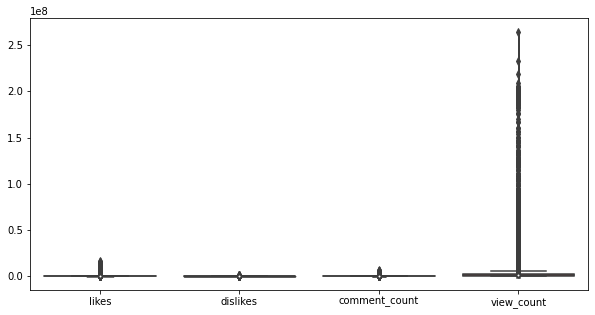

In [9]:
titles = ["likes", "dislikes", "comment_count", "view_count"]

plt.figure(figsize=(10, 5))

sns.violinplot(data=df[titles])
sns.boxplot(data=df[titles])
plt.show()

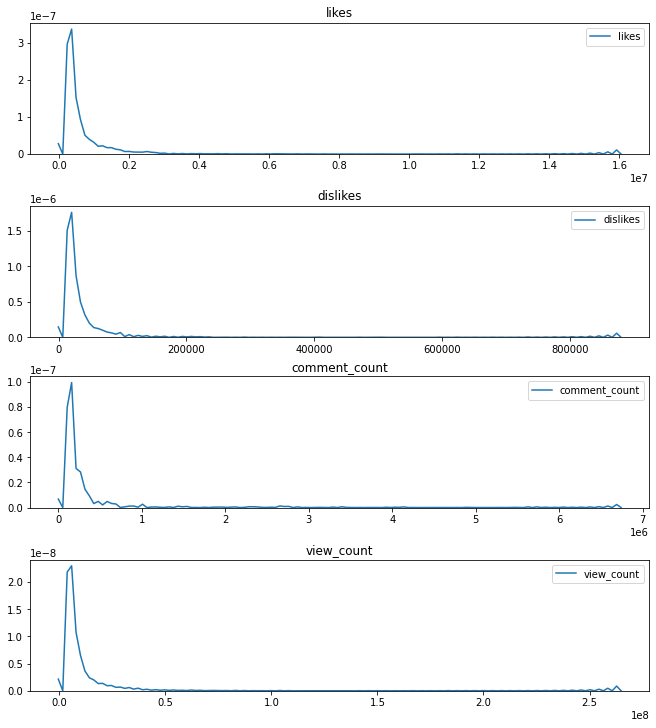

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=1, constrained_layout=True, figsize=(9, 10))


for i, title in enumerate(titles):
    axes[i].title.set_text(title)
    sns.kdeplot(df[title], ax=axes[i])
plt.show()

/Users/aiel/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


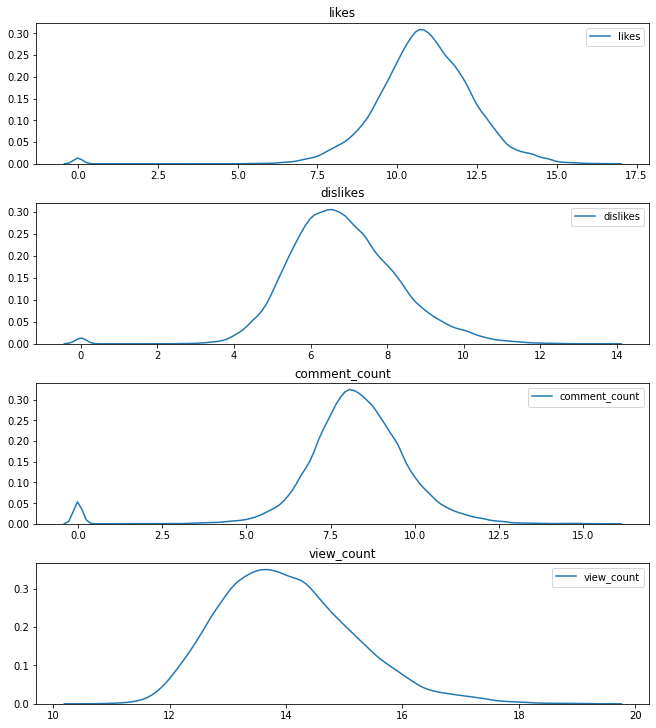

In [11]:
eps = 1
df[titles] = np.log(df[titles] + eps)

fig, axes = plt.subplots(nrows=4, ncols=1, constrained_layout=True, figsize=(9, 10))


for i, title in enumerate(titles):
    axes[i].title.set_text(title)
    sns.kdeplot(df[title], ax=axes[i])
plt.show()

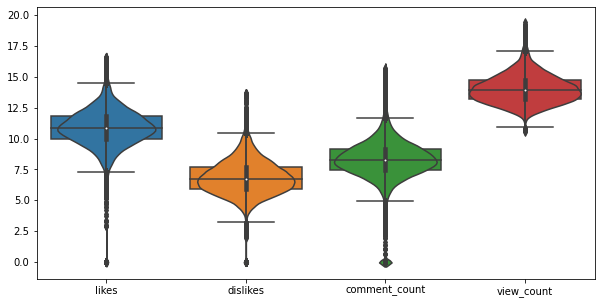

In [12]:
plt.figure(figsize=(10, 5))

sns.violinplot(data=df[titles])
sns.boxplot(data=df[titles])
plt.show()

# Date

/Users/aiel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/aiel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[]

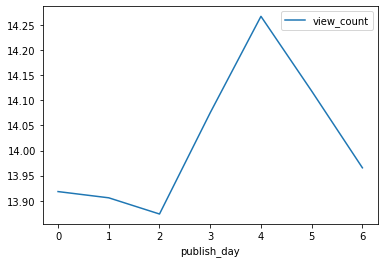

In [13]:
df["trending_date"] = pd.to_datetime(df["trending_date"])
df["publish_day"] = df["publishedAt"].dt.weekday
df[["publish_day", "view_count"]].groupby("publish_day").mean("view_count").sort_values("publish_day").plot()
plt.plot()

/Users/aiel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


[]

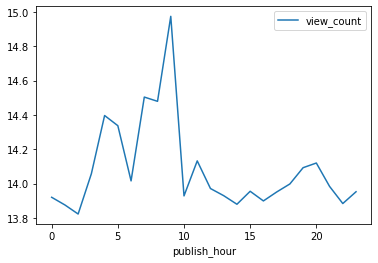

In [14]:
df["publish_hour"] = df["publishedAt"].dt.hour
df[["publish_hour", "view_count"]].groupby("publish_hour").mean("view_count").plot()
plt.plot()

![youtube](https://user-images.githubusercontent.com/40621030/200320014-dc62f8cf-f8bc-4fd8-b3a7-38c6004b7109.png)


/Users/aiel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


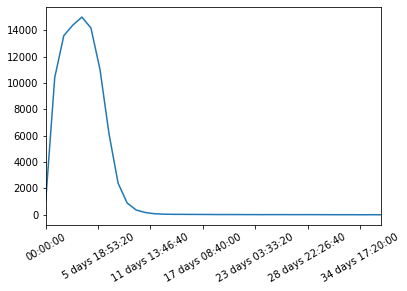

In [15]:
df["trending_date-publishedAt"] = df["trending_date"].dt.date - df["publishedAt"].dt.date
df["trending_date-publishedAt"].value_counts().sort_index().plot(rot=30)
plt.show()

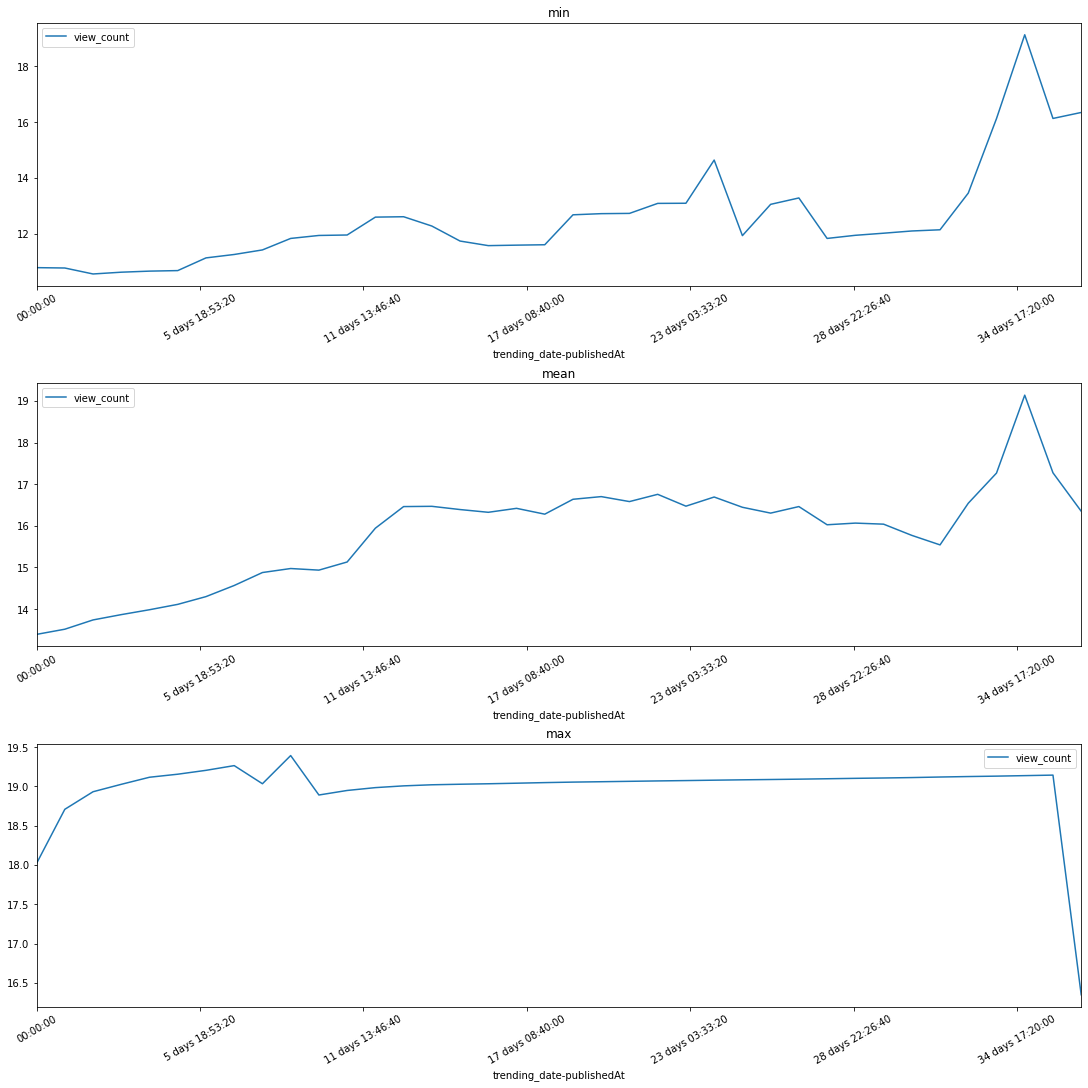

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=1, constrained_layout=True, figsize=(15, 15))

axes[0].title.set_text("min")
axes[1].title.set_text("mean")
axes[2].title.set_text("max")

df[["trending_date-publishedAt", "view_count"]].groupby("trending_date-publishedAt").min().plot(rot=30, ax=axes[0])
df[["trending_date-publishedAt", "view_count"]].groupby("trending_date-publishedAt").mean().plot(rot=30, ax=axes[1])
df[["trending_date-publishedAt", "view_count"]].groupby("trending_date-publishedAt").max().plot(rot=30, ax=axes[2])

plt.show()

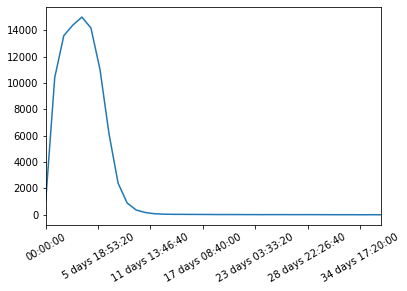

In [17]:
temp_df = df.copy()
temp_df.drop_duplicates("video_id")

temp_df["trending_date-publishedAt"].value_counts().sort_index().plot(rot=30)
plt.show()

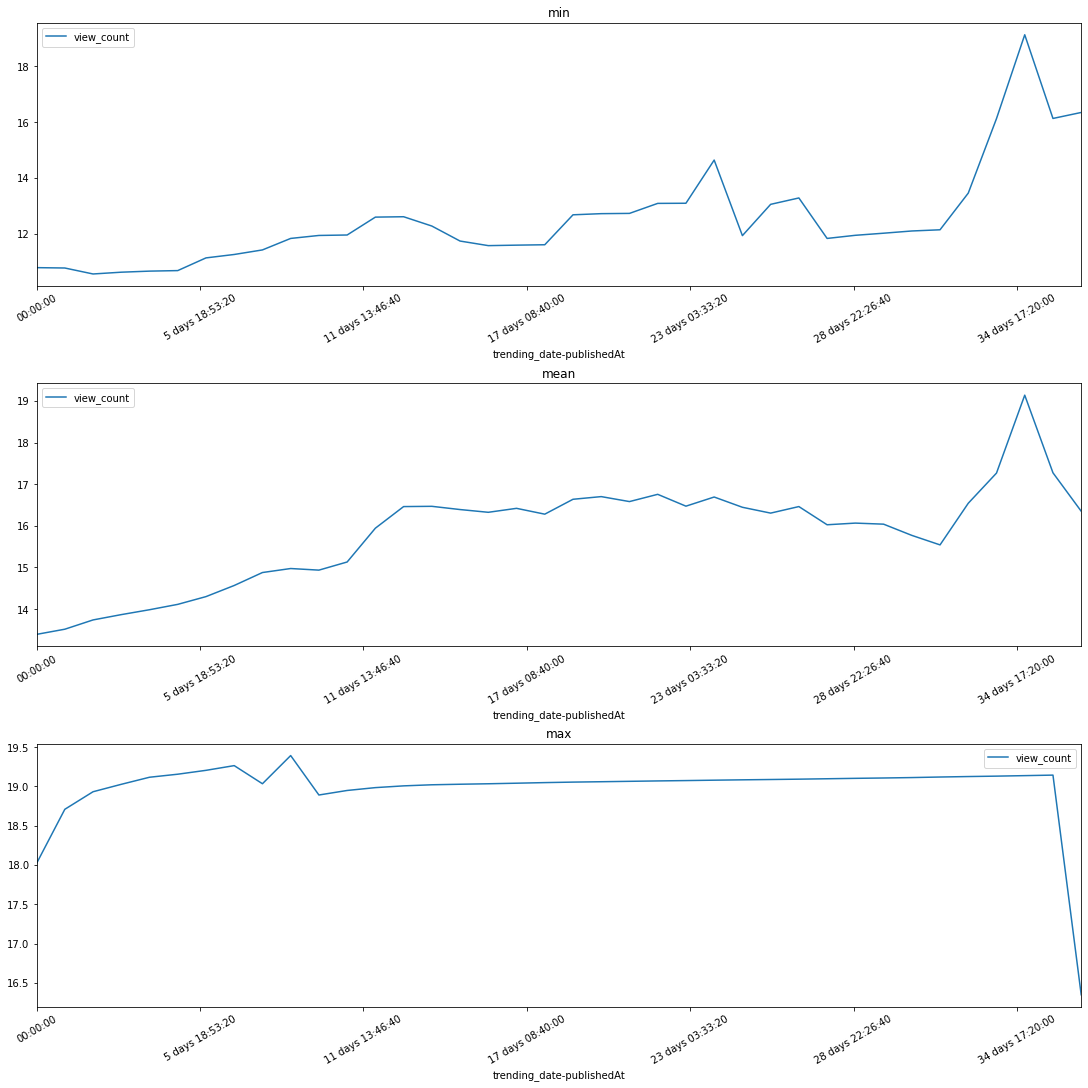

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=1, constrained_layout=True, figsize=(15, 15))

axes[0].title.set_text("min")
axes[1].title.set_text("mean")
axes[2].title.set_text("max")

df[["trending_date-publishedAt", "view_count"]].groupby("trending_date-publishedAt").min().plot(rot=30, ax=axes[0])
df[["trending_date-publishedAt", "view_count"]].groupby("trending_date-publishedAt").mean().plot(rot=30, ax=axes[1])
df[["trending_date-publishedAt", "view_count"]].groupby("trending_date-publishedAt").max().plot(rot=30, ax=axes[2])

plt.show()

In [19]:
df["trending_date-publishedAt"] = df["trending_date-publishedAt"] / np.timedelta64(1, 'D')

/Users/aiel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Category

In [20]:
id_to_category = {}

with open("./US_category_id.json","r") as f:
    id_data = json.load(f)
    for category in id_data["items"]:
        id_to_category[category["id"]] = category["snippet"]["title"]

# id_to_category

df["categoryId"] = df["categoryId"].astype(str)
df.insert(4, "category", df["categoryId"].map(id_to_category))

df.isnull().sum()

/Users/aiel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


video_id                     0
title                        0
publishedAt                  0
channelId                    0
category                     0
channelTitle                 0
categoryId                   0
trending_date                0
tags                         0
view_count                   0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
description                  0
id                           0
duration_seconds             0
has_thumbnail                0
target                       0
publish_day                  0
publish_hour                 0
trending_date-publishedAt    0
dtype: int64

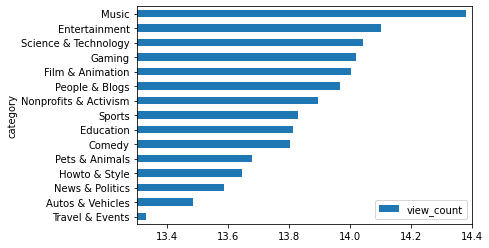

In [21]:
df[["category", "view_count"]].groupby("category").mean().sort_values("view_count").plot.barh(rot=0)
plt.xlim([13.3, 14.4])
plt.show()

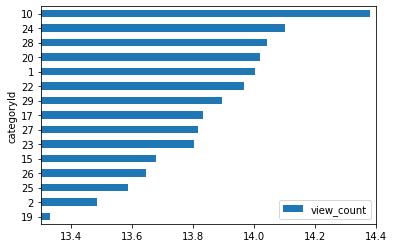

In [22]:
df[["categoryId", "view_count"]].groupby("categoryId").mean().sort_values("view_count").plot.barh(rot=0)
plt.xlim([13.3, 14.4])
plt.show()

# Tag

In [23]:
df["tags"].iloc[0]

'fox|fox sports|fs1|fox sports 1|undisputed|skip bayless|shannon sharpe|skip and shannon|fs1 undisputed|skip|bayless|shannon|sharpe|sports|news|los angeles|lakers|nba|basketball|bubble|lebron|james|anthony davis|ad|kyle|kuzma|denver|nuggets|KyleKuzma|Alexander|Los Angeles Lakers|LeBron vs Lakers|LeBronJames|Raymone|National Basketball Association|Denver Nuggets|Kyle Kuzma|AnthonyDavis|Anthony|Marshon|davis|LeBron vs Kyle Kuzma'

/Users/aiel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


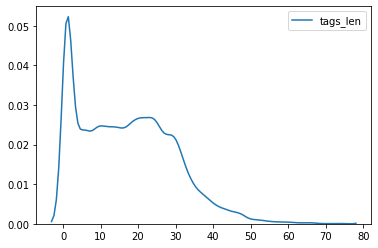

In [24]:
df["tags_len"] = df["tags"].apply(lambda x : len(x.split("|")) if x != "[none]" else 0)

sns.kdeplot(df["tags_len"])
plt.show()

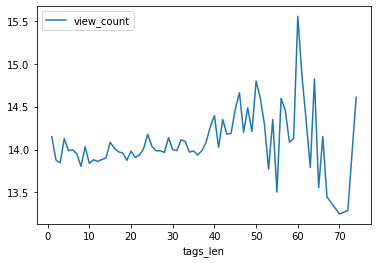

In [25]:
df[["tags_len", "view_count"]].groupby("tags_len").mean("view_count").plot()
plt.show()

# view_count

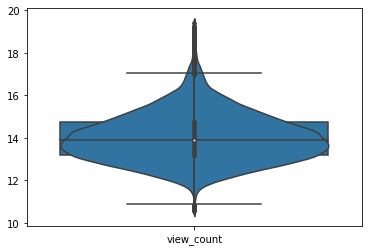

In [26]:
sns.violinplot(data=df[["view_count"]])
sns.boxplot(data=df[["view_count"]])
plt.show()

# likes

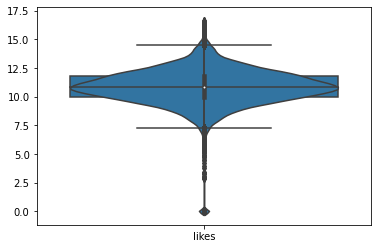

In [27]:
sns.violinplot(data=df[["likes"]])
sns.boxplot(data=df[["likes"]])
plt.show()

Corr_Coefficient : 0.705 
p-value : 0.000


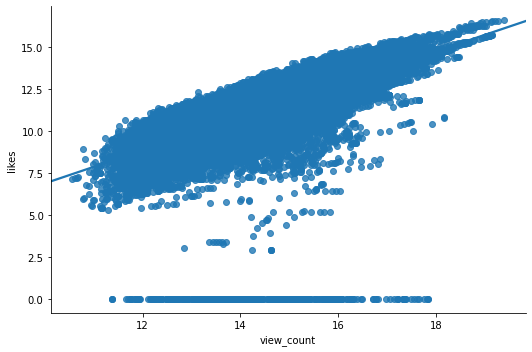

In [28]:
# 피어슨 상관계수 검정
corr = stats.pearsonr(df["view_count"], df["likes"])
print('Corr_Coefficient : %.3f \np-value : %.3f' % (corr))
sns.lmplot(data=df, x="view_count", y="likes", height=5, aspect=1.5);

![likes0](https://user-images.githubusercontent.com/40621030/200327481-8d4146ee-518c-498d-9267-1e93fb1cc6e9.png)
![likes0_1](https://user-images.githubusercontent.com/40621030/200327546-b502f6a1-40a6-4d6a-ad02-92cf97fc5d7d.png)
like == 0는 급하게 tranding으로 오르거나 정부 스트리밍으로 보임 --> 삭제

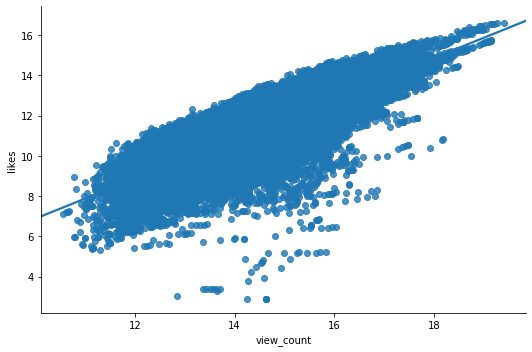

In [29]:
df = df.loc[~(df["likes"]==0)]
sns.lmplot(data=df, x="view_count", y="likes", height=5, aspect=1.5);

# dislikes

Corr_Coefficient : 0.837 
p-value : 0.000


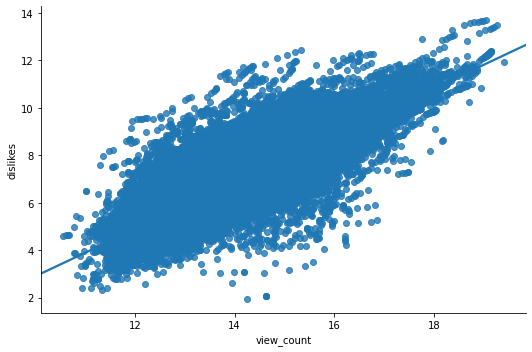

In [30]:
corr = stats.pearsonr(df["view_count"], df["dislikes"])
print('Corr_Coefficient : %.3f \np-value : %.3f' % (corr))
sns.lmplot(data=df, x="view_count", y="dislikes", height=5, aspect=1.5);

# comment_count

Corr_Coefficient : 0.837 
p-value : 0.000


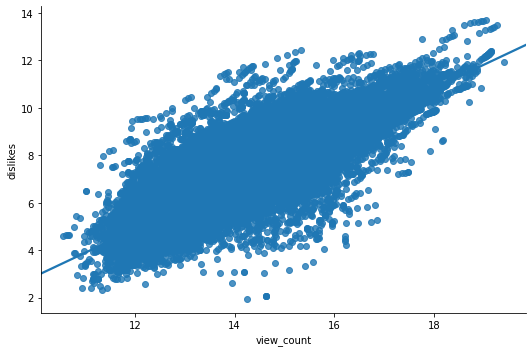

In [31]:
corr = stats.pearsonr(df["view_count"], df["dislikes"])
print('Corr_Coefficient : %.3f \np-value : %.3f' % (corr))
sns.lmplot(data=df, x="view_count", y="dislikes", height=5, aspect=1.5);

# description

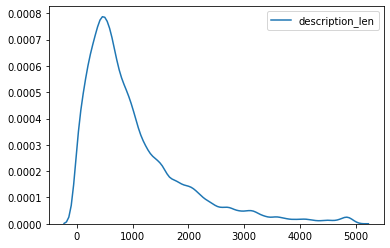

In [32]:
df["description_len"] = df["description"].apply(lambda x : len(x))

sns.kdeplot(df["description_len"])
plt.show()

In [33]:
df.sort_values("description_len").tail(5)

,video_id,title,publishedAt,channelId,category,channelTitle,categoryId,trending_date,tags,view_count,...,description,id,duration_seconds,has_thumbnail,target,publish_day,publish_hour,trending_date-publishedAt,tags_len,description_len
51407,69Nlu9W1X2s,Stacking Tops #shorts,2021-04-30 21:30:15+00:00,UC6nSFpj9HTCZ5t-N3Rm3-HA,Entertainment,Vsauce,24,2021-05-02,[None],13.555043,...,there's nothing #short about this stack of top...,69Nlu9W1X2s_2021-05-02,51.0,True,0.094365,4,21,2.0,1,4998
52095,69Nlu9W1X2s,Stacking Tops #shorts,2021-04-30 21:30:15+00:00,UC6nSFpj9HTCZ5t-N3Rm3-HA,Entertainment,Vsauce,24,2021-05-05,[None],13.772008,...,there's nothing #short about this stack of top...,69Nlu9W1X2s_2021-05-05,51.0,True,0.086835,4,21,5.0,1,4998
51190,69Nlu9W1X2s,Stacking Tops #shorts,2021-04-30 21:30:15+00:00,UC6nSFpj9HTCZ5t-N3Rm3-HA,Entertainment,Vsauce,24,2021-05-01,[None],13.165373,...,there's nothing #short about this stack of top...,69Nlu9W1X2s_2021-05-01,51.0,True,0.110799,4,21,1.0,1,4998
51861,69Nlu9W1X2s,Stacking Tops #shorts,2021-04-30 21:30:15+00:00,UC6nSFpj9HTCZ5t-N3Rm3-HA,Entertainment,Vsauce,24,2021-05-04,[None],13.736547,...,there's nothing #short about this stack of top...,69Nlu9W1X2s_2021-05-04,51.0,True,0.087628,4,21,4.0,1,4998
52319,69Nlu9W1X2s,Stacking Tops #shorts,2021-04-30 21:30:15+00:00,UC6nSFpj9HTCZ5t-N3Rm3-HA,Entertainment,Vsauce,24,2021-05-06,[None],13.802383,...,there's nothing #short about this stack of top...,69Nlu9W1X2s_2021-05-06,51.0,True,0.086022,4,21,6.0,1,4998


![description_len](https://user-images.githubusercontent.com/40621030/200330049-f11e9efe-80e3-4e36-acd0-c0b3f879038c.png)

...?????

# duration_seconds

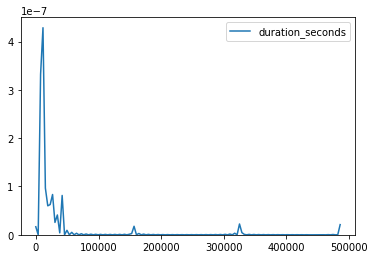

In [34]:
sns.kdeplot(df["duration_seconds"])
plt.show()

In [35]:
df.sort_values("duration_seconds").tail(3)

,video_id,title,publishedAt,channelId,category,channelTitle,categoryId,trending_date,tags,view_count,...,description,id,duration_seconds,has_thumbnail,target,publish_day,publish_hour,trending_date-publishedAt,tags_len,description_len
17653,MmrGeWxd87Y,Live 2020 Election Results: Joe Biden beats Do...,2020-10-27 15:03:27+00:00,UCXIJgqnII2ZOINSWNOGFThA,News & Politics,Fox News,25,2020-11-09,Fox News|election results|2020 election|electi...,17.649503,...,Stay here to get the latest U.S. election resu...,MmrGeWxd87Y_2020-11-09,485620.0,True,0.003096,1,15,13.0,31,2009
18105,MmrGeWxd87Y,Live 2020 Election Results: Joe Biden beats Do...,2020-10-27 15:03:27+00:00,UCXIJgqnII2ZOINSWNOGFThA,News & Politics,Fox News,25,2020-11-11,Fox News|election results|2020 election|electi...,17.649291,...,Stay here to get the latest U.S. election resu...,MmrGeWxd87Y_2020-11-11,485620.0,True,0.003094,1,15,15.0,31,2009
17890,MmrGeWxd87Y,Live 2020 Election Results: Joe Biden beats Do...,2020-10-27 15:03:27+00:00,UCXIJgqnII2ZOINSWNOGFThA,News & Politics,Fox News,25,2020-11-10,Fox News|election results|2020 election|electi...,17.649308,...,Stay here to get the latest U.S. election resu...,MmrGeWxd87Y_2020-11-10,485620.0,True,0.003095,1,15,14.0,31,2009


계속 스트리밍 되는 영상 때문에 이상치가 있는 듯

In [36]:
def split_outlier(df, fator=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outlier_index = ((df < (Q1 - fator * IQR)) |(df > (Q3 + fator * IQR))).any(axis=1)
    return df[~outlier_index]

In [37]:
df[["duration_seconds"]] = split_outlier(df[["duration_seconds"]], 3)

df = df.dropna()
df.isna().sum()

video_id                     0
title                        0
publishedAt                  0
channelId                    0
category                     0
channelTitle                 0
categoryId                   0
trending_date                0
tags                         0
view_count                   0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
description                  0
id                           0
duration_seconds             0
has_thumbnail                0
target                       0
publish_day                  0
publish_hour                 0
trending_date-publishedAt    0
tags_len                     0
description_len              0
dtype: int64

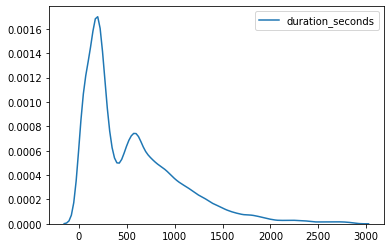

In [38]:
df.dropna()
sns.kdeplot(df["duration_seconds"])
plt.show()

# Corr

In [39]:
df[titles] = np.exp(df[titles]) - eps
titles += ["duration_seconds", "tags_len", "description_len", "trending_date-publishedAt"]
df[titles].corr(method="pearson")

,likes,dislikes,comment_count,view_count,duration_seconds,tags_len,description_len,trending_date-publishedAt
likes,1.000000,0.666285,0.721090,0.860141,-0.070285,-0.039217,0.030120,0.148286
dislikes,0.666285,1.000000,0.535196,0.703008,-0.068752,-0.014129,0.026419,0.151358
comment_count,0.721090,0.535196,1.000000,0.546234,-0.028612,-0.010739,0.036165,0.025388
view_count,0.860141,0.703008,0.546234,1.000000,-0.083262,-0.024653,0.034194,0.270675
duration_seconds,-0.070285,-0.068752,-0.028612,-0.083262,1.000000,0.091833,0.171583,-0.012629
tags_len,-0.039217,-0.014129,-0.010739,-0.024653,0.091833,1.000000,0.236534,-0.004047
description_len,0.030120,0.026419,0.036165,0.034194,0.171583,0.236534,1.000000,0.000392
trending_date-publishedAt,0.148286,0.151358,0.025388,0.270675,-0.012629,-0.004047,0.000392,1.000000


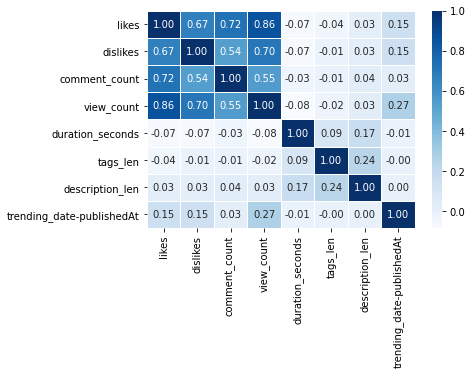

In [40]:
sns.heatmap(df[titles].corr(method="pearson"), annot = True, fmt = ".2f", linewidths = .5, cmap = "Blues")
plt.show()

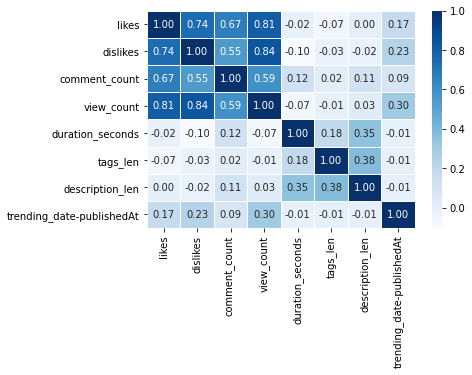

In [41]:
sns.heatmap(np.log(df[titles] + 1).corr(method="pearson"), annot = True, fmt = ".2f", linewidths = .5, cmap = "Blues")
plt.show()

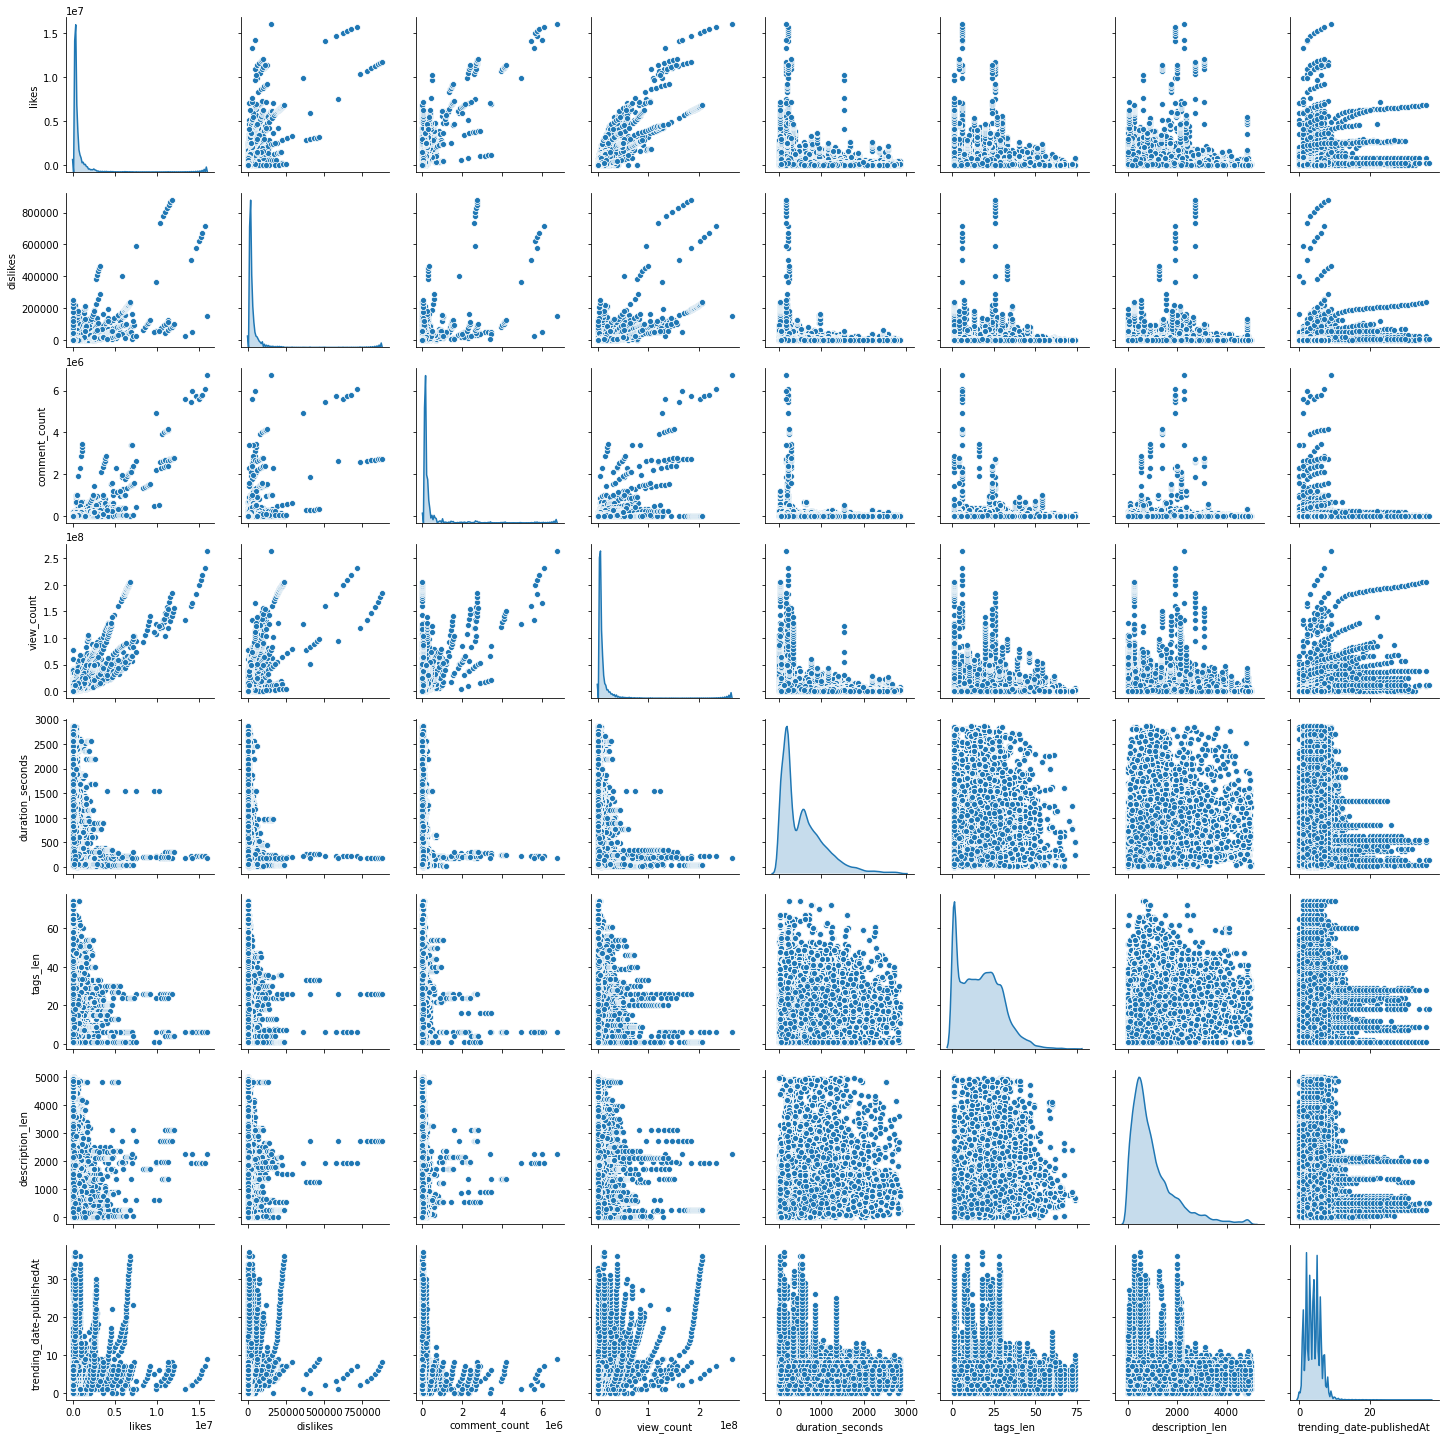

In [42]:
sns.pairplot(df[titles], diag_kind="kde")
plt.show()

In [43]:
df[titles] = np.log(df[titles] + eps)

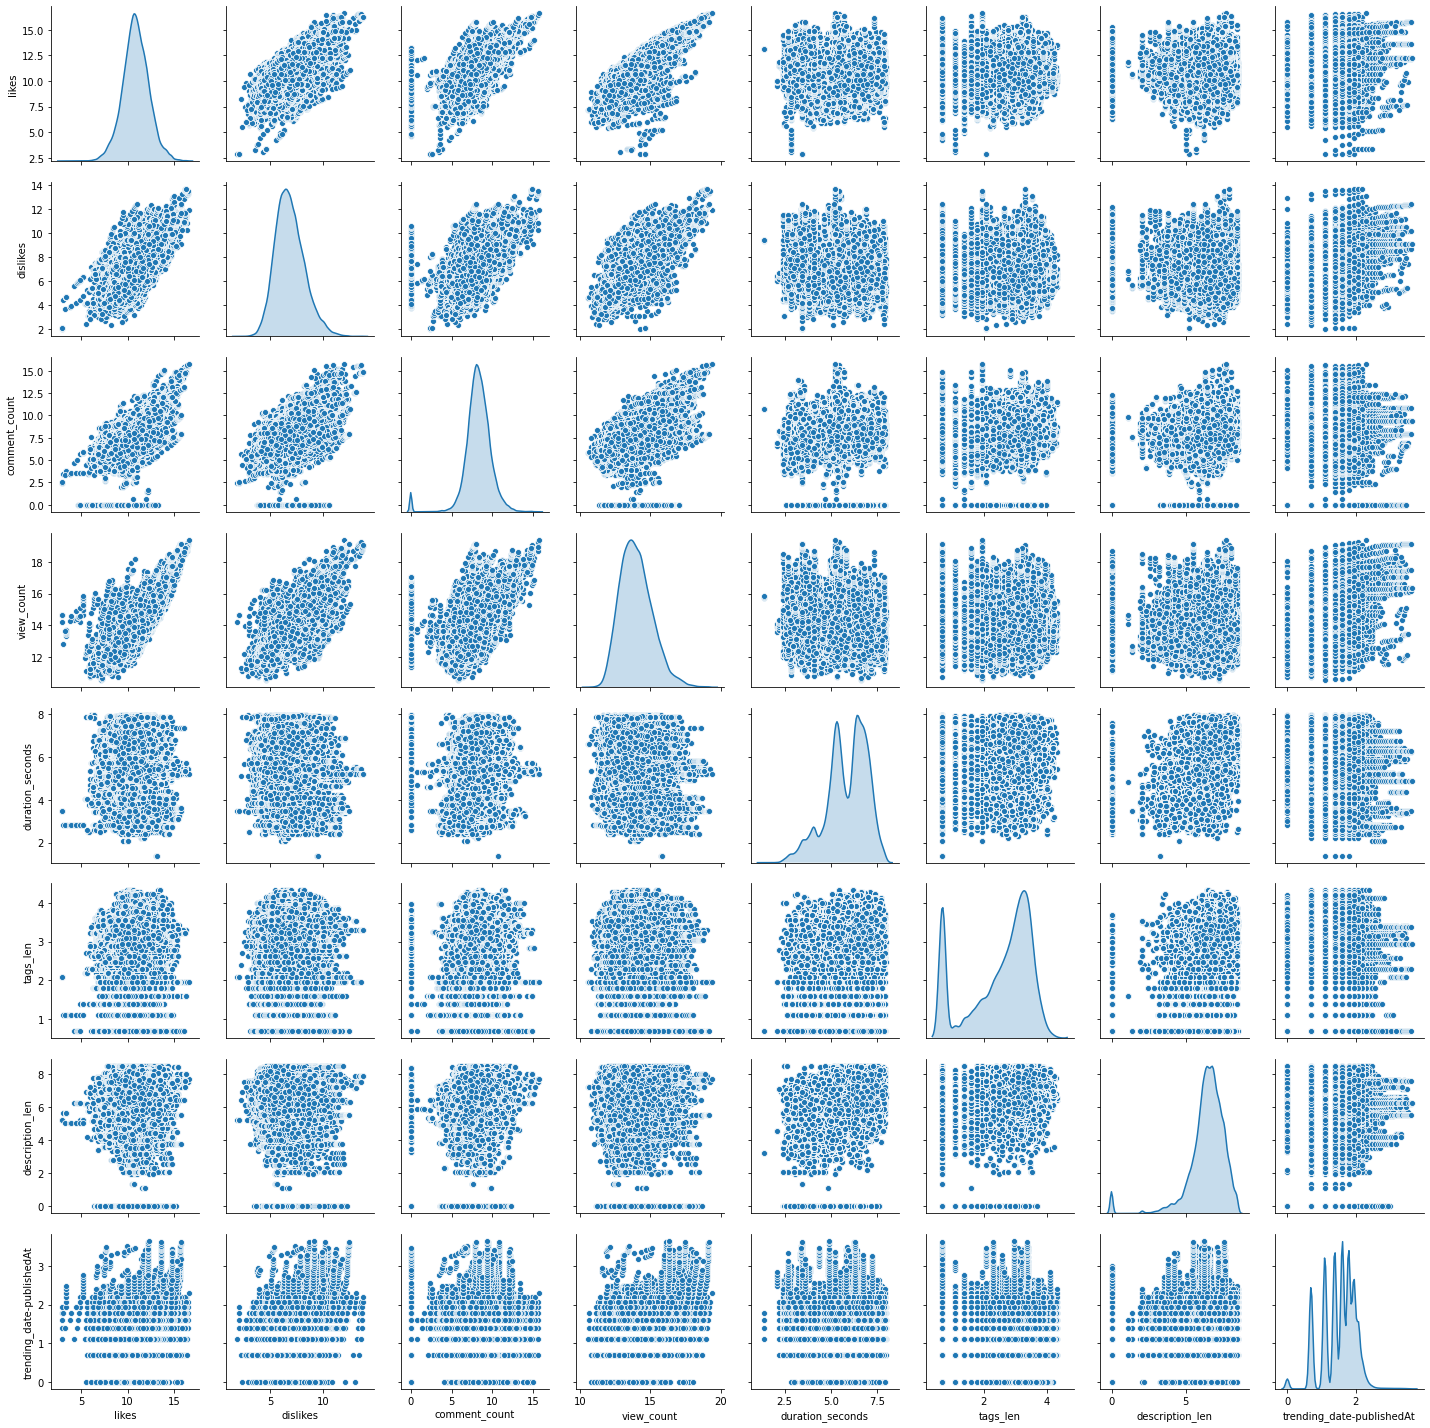

In [44]:
sns.pairplot(df[titles], diag_kind="kde")
plt.show()

In [45]:
df = df.reset_index()
df

,index,video_id,title,publishedAt,channelId,category,channelTitle,categoryId,trending_date,tags,...,description,id,duration_seconds,has_thumbnail,target,publish_day,publish_hour,trending_date-publishedAt,tags_len,description_len
0,40,n_8hxS_7Vis,Shannon reacts to Kyle Kuzma's game-winning sh...,2020-08-11 16:21:47+00:00,UCLXzq85ijg2LwJWFrz4pkmw,Sports,Skip and Shannon: UNDISPUTED,17,2020-08-12,fox|fox sports|fs1|fox sports 1|undisputed|ski...,...,LeBron and the Lakers finally snapped their 3-...,n_8hxS_7Vis_2020-08-12,7.014814,True,0.013235,1,16,0.693147,3.761200,7.652071
1,41,OQZ5ht79nEw,Answering Your Assumptions About Us... Merrell...,2020-08-11 17:29:52+00:00,UCwtnkRZcvL4bfopzJ-Von8Q,Comedy,merrelltwins,23,2020-08-12,Merrell Twins|Twins|Merrell|Veronica Merrell|V...,...,We answered your assumptions about us...Go to ...,OQZ5ht79nEw_2020-08-12,6.988413,True,0.087630,1,17,0.693147,2.890372,7.026427
2,42,zHPVGSwLhcg,Unboxing Apple's $129 Luxury Cable,2020-08-11 14:42:43+00:00,UCsTcErHg8oDvUnTzoqsYeNw,Science & Technology,Unbox Therapy,28,2020-08-12,unbox therapy|unboxtherapy|tech|technology|gad...,...,ShhhhFOLLOW ME IN THESE PLACES FOR UPDATES\rTw...,zHPVGSwLhcg_2020-08-12,6.084499,False,0.061170,1,14,0.693147,2.772589,5.192957
3,43,gi3VMMiFHVg,Giannis Gets Ejected After Headbutting Mo Wagner,2020-08-12 02:30:32+00:00,UC9-OpMMVoNP5o10_Iyq7Ndw,Sports,Bleacher Report,17,2020-08-12,bleacher report|br|nba|giannis|giannis antetok...,...,"In a random and wild sequence of events, Giann...",gi3VMMiFHVg_2020-08-12,5.105945,False,0.010938,2,2,0.000000,2.995732,6.021023
4,44,p6RatnMhDj8,I TOOK A PREGNANCY TEST...,2020-08-11 02:40:01+00:00,UCpGCAsPlArOj9ptyCszxOOg,People & Blogs,ValeYas Vlogs,22,2020-08-12,valeyas|vlogs|daily vlogs|beautyybird|pregnanc...,...,▷SUBSCRIBE FOR DAILY VLOGS: http://bit.ly/2lFI...,p6RatnMhDj8_2020-08-12,7.360740,False,0.050031,1,2,0.693147,2.564949,6.593045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88181,92270,H1tQhK0n5Qk,thanks for 5 million,2021-11-23 19:13:46+00:00,UCSUf5_EPEfl4zlBKZHkZdmw,Comedy,Danny Gonzalez,23,2021-11-30,danny gonzalez|funny|commentary|comedy|react|r...,...,#shorts,H1tQhK0n5Qk_2021-11-30,4.094345,True,0.203994,1,19,2.079442,2.302585,2.079442
88182,92271,3CuO39VL3rk,Mrs. Rogers done F’ed up😅 #shorts #story #come...,2021-11-24 23:48:37+00:00,UCqseWqrl7r-hNoWme7hIfTw,Comedy,Rebecca Rogers (Mrs. Rogers),23,2021-11-30,[None],...,,3CuO39VL3rk_2021-11-30,4.077537,True,0.135238,2,23,1.945910,0.693147,0.000000
88183,92272,qfDVsuwg0TU,MY NEW KITCHEN REVEAL!!!!! EXCITING,2021-11-23 22:50:19+00:00,UCnB4LOZe6Dc5JUH9EoaHhKQ,Film & Animation,Bri & Fern,1,2021-11-30,10-19-21,...,Contracter email: Los3topetes@gmail.comFOLLOW ...,qfDVsuwg0TU_2021-11-30,6.715383,True,0.075052,1,22,2.079442,0.693147,5.262690
88184,92273,HHbF8HaC4w8,Using Reverse Psychology To Get ANYTHING You Want,2021-11-21 21:15:16+00:00,UCQNDoTI2g7_daH6zL_9rvWg,Comedy,Amyy Woahh,23,2021-11-30,[None],...,,HHbF8HaC4w8_2021-11-30,4.043051,True,0.059290,6,21,2.302585,0.693147,0.000000


In [46]:
df.columns

Index(['index', 'video_id', 'title', 'publishedAt', 'channelId', 'category',
       'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count',
       'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'description', 'id',
       'duration_seconds', 'has_thumbnail', 'target', 'publish_day',
       'publish_hour', 'trending_date-publishedAt', 'tags_len',
       'description_len'],
      dtype='object')

In [47]:
df[df["has_thumbnail"] == False]

,index,video_id,title,publishedAt,channelId,category,channelTitle,categoryId,trending_date,tags,...,description,id,duration_seconds,has_thumbnail,target,publish_day,publish_hour,trending_date-publishedAt,tags_len,description_len
2,42,zHPVGSwLhcg,Unboxing Apple's $129 Luxury Cable,2020-08-11 14:42:43+00:00,UCsTcErHg8oDvUnTzoqsYeNw,Science & Technology,Unbox Therapy,28,2020-08-12,unbox therapy|unboxtherapy|tech|technology|gad...,...,ShhhhFOLLOW ME IN THESE PLACES FOR UPDATES\rTw...,zHPVGSwLhcg_2020-08-12,6.084499,False,0.061170,1,14,0.693147,2.772589,5.192957
3,43,gi3VMMiFHVg,Giannis Gets Ejected After Headbutting Mo Wagner,2020-08-12 02:30:32+00:00,UC9-OpMMVoNP5o10_Iyq7Ndw,Sports,Bleacher Report,17,2020-08-12,bleacher report|br|nba|giannis|giannis antetok...,...,"In a random and wild sequence of events, Giann...",gi3VMMiFHVg_2020-08-12,5.105945,False,0.010938,2,2,0.000000,2.995732,6.021023
4,44,p6RatnMhDj8,I TOOK A PREGNANCY TEST...,2020-08-11 02:40:01+00:00,UCpGCAsPlArOj9ptyCszxOOg,People & Blogs,ValeYas Vlogs,22,2020-08-12,valeyas|vlogs|daily vlogs|beautyybird|pregnanc...,...,▷SUBSCRIBE FOR DAILY VLOGS: http://bit.ly/2lFI...,p6RatnMhDj8_2020-08-12,7.360740,False,0.050031,1,2,0.693147,2.564949,6.593045
29,69,jp47GeO6k6Q,How Does He Get Away With This?,2020-08-09 18:42:25+00:00,UC3L9XPe0_FGfRG-CMGtBvFg,Sports,JxmyHighroller,17,2020-08-12,LeBron James|LA Lakers|House of Highlights|ESP...,...,🔥GET YOUR EXCLUSIVE BASKETBALL SHORTS NOW! htt...,jp47GeO6k6Q_2020-08-12,6.748760,False,0.045802,6,18,1.386294,3.367296,6.883463
36,76,goOmZUwQYlA,100k,2020-08-11 03:06:21+00:00,UCf1JAjcoBlCRi4pHG2k_W7w,Entertainment,Lilypi2,24,2020-08-12,[None],...,thanks,goOmZUwQYlA_2020-08-12,3.044522,False,0.103429,1,3,0.693147,0.693147,1.945910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88159,92246,oGfETp3d-1g,How I beat Breath of the Wild BLINDFOLDED (Gre...,2021-11-24 09:38:56+00:00,UCG6zBb8GZKo1XZW4eHdg-0Q,Gaming,PointCrow,20,2021-11-30,pointcrow|point crow|breath of the wild|botw|b...,...,This is the story and gameplay of how I ended ...,oGfETp3d-1g_2021-11-30,7.764296,False,0.070722,2,9,1.945910,3.401197,6.738152
88168,92257,Yfr4s_uHcFg,GRM *are me and Justin still together *,2021-11-24 02:32:08+00:00,UCvqdTowktwavf26GJpU6OtA,People & Blogs,Brooklyn Frost,22,2021-11-30,Brooklyn|funny|friendly|cute|grm|trendy|hot|new,...,,Yfr4s_uHcFg_2021-11-30,6.598509,False,0.067678,2,2,1.945910,2.197225,0.000000
88172,92261,Pp-5DP0UoTg,New disturbing allegations emerge in Waukesha ...,2021-11-24 04:17:08+00:00,UCFmofUYwZd1Ibf_O3PF71jg,News & Politics,FOX 32 Chicago,25,2021-11-30,waukesha|parade crash|christmas,...,A judge in disbelief as we learn disturbing ne...,Pp-5DP0UoTg_2021-11-30,5.129899,False,0.019026,2,4,1.945910,1.386294,7.108244
88175,92264,vb8FfN3CHag,Caught On Camera! Paranormal Footprints Leadin...,2021-11-23 21:00:09+00:00,UCluqnG4yYHGsfRuV-_wjHNw,People & Blogs,Matthias,22,2021-11-30,hi5 studios|hi5|high five|matthias|matthiasiam...,...,Season 2 Album ➡ https://fanlink.to/project863...,vb8FfN3CHag_2021-11-30,7.431892,False,0.052135,1,21,2.079442,3.555348,7.351800


In [48]:
def download_image(urls, image_path):
    try:
        request.urlretrieve(urls, image_path)
    except:
        pass

In [ ]:
from urllib import request
from urllib.error import HTTPError
from multiprocessing import Process

if not os.path.exists("thumbnails"):
    os.makedirs("thumbnails")
    
df_no_thumbnails = df[df["has_thumbnail"] == False]

index = 0
process = []
for i, d in df_no_thumbnails.iterrows():
    index += 1
    df.iloc[i, df.columns.get_loc("has_thumbnail")] = True
    p = Process(target=download_image, args=(d["thumbnail_link"], os.path.join("thumbnails", d['video_id'] + ".jpg")))
    p.start()
    process += [p]

    if index % 100 == 0:
        for p in process:
            p.join()
        process = []

In [ ]:
for i, d in df_no_thumbnails.iterrows():
    if os.path.exists(os.path.join("thumbnails", d['video_id'] + ".jpg")):
        df.iloc[i, df.columns.get_loc("has_thumbnail")] = True
df[df["has_thumbnail"] == False]

In [ ]:
import shutil
import os
    
source_dir = './thumbnails'
target_dir = '../kaggle-pog-series-s01e01/thumbnails'
    
file_names = os.listdir(source_dir)
    
for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)
    
df.to_parquet("../kaggle-pog-series-s01e01/dataset.parquet")